In [727]:
### Linear Regression, Data Cleaning, and Feature Engineering
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [728]:
## Loading Data
data_url = "./kc_house_data.csv"
kc_data = pd.read_csv(data_url)

print(kc_data.columns)

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')


In [ ]:
## Data Cleaning
from scipy import stats

kc_data = kc_data.dropna(axis=0)

               id        date      price  bedrooms  bathrooms  sqft_living  \
1      6414100192   12/9/2014   538000.0         3       2.25         2570   
3      2487200875   12/9/2014   604000.0         4       3.00         1960   
4      1954400510   2/18/2015   510000.0         3       2.00         1680   
5      7237550310   5/12/2014  1230000.0         4       4.50         5420   
6      1321400060   6/27/2014   257500.0         3       2.25         1715   
...           ...         ...        ...       ...        ...          ...   
21591  2997800021   2/19/2015   475000.0         3       2.50         1310   
21592   263000018   5/21/2014   360000.0         3       2.50         1530   
21593  6600060120   2/23/2015   400000.0         4       2.50         2310   
21594  1523300141   6/23/2014   402101.0         2       0.75         1020   
21596  1523300157  10/15/2014   325000.0         2       0.75         1020   

       sqft_lot  floors  waterfront  view  ...  grade  sqft_abo

In [ ]:
kc_df = pd.DataFrame(kc_data, columns=kc_data.columns)
print("Old Shape: ", kc_df.shape)

Old Shape:  (15762, 21)


In [732]:
zscore = np.abs(stats.zscore(kc_df['price']))
print("ZScore: ", zscore)

ZScore:  [8.91201154e-03 1.68405323e-01 8.41375476e-02 1.85023338e+00
 7.62510685e-01 8.37736221e-01 5.86536663e-01 1.96975852e-01
 3.79666439e-01 3.04050218e-02 2.91990133e-01 3.93099571e-01
 1.51303205e-01 9.46544586e-01 8.36392908e-01 4.19965834e-01
 3.91893562e+00 6.88628462e-01 5.70416906e-01 8.28333029e-01
 3.37662780e-01 4.77367347e-01 1.05269606e-01 7.02061594e-01
 3.92738619e-01 1.69718904e-02 5.87879977e-01 4.15574942e-01
 2.33275039e-02 2.65123870e-01 8.09526645e-01 1.71091950e-01
 6.27818419e-01 8.61528039e-01 3.86022053e-01 6.24149431e-01
 8.88808987e-01 6.54684682e-01 2.45335125e-01 2.17262853e+00
 8.41766161e-01 5.27430885e-01 1.17359424e-01 1.01737923e+00
 6.45642442e-01 2.99067651e-01 6.77881957e-01 2.06408776e-02
 3.12500782e-01 6.00977280e-01 6.83255210e-01 2.11889601e+00
 1.33977439e+00 5.81163411e-01 7.97466560e-02 5.16684380e-01
 7.82299430e-01 3.52800176e-01 4.80053973e-01 4.06532702e-01
 4.87131491e-01 5.00564622e-01 4.97877996e-01 6.08029674e-01
 1.07111176e+00

In [733]:
threshold_z = 3
outlier_inds = np.where(zscore > threshold_z)[0]
print(outlier_inds)

[   16   112   186   211   225   233   388   403   485   577   600   761
   860   861   905   948  1011  1052  1065  1076  1228  1267  1291  1425
  1426  1526  1567  1612  1659  1785  1806  1912  2091  2094  2120  2167
  2200  2348  2388  2433  2463  2558  2717  2726  2733  2800  2835  2912
  2915  2999  3035  3146  3200  3212  3253  3374  3465  3501  3542  3593
  3960  3974  3976  4071  4077  4152  4233  4234  4272  4335  4389  4493
  4521  4600  4650  4726  4732  4869  4886  4905  4927  4937  4945  5093
  5117  5184  5236  5287  5331  5333  5386  5404  5419  5473  5528  5579
  5762  5813  5855  5888  5989  6067  6285  6398  6496  6688  6748  6749
  6802  6895  6922  6984  7060  7179  7211  7353  7572  7626  7641  7643
  7687  7695  7898  7966  8085  8111  8205  8212  8231  8248  8325  8364
  8496  8532  8603  8649  8733  8753  8970  8980  9033  9095  9134  9184
  9209  9231  9273  9316  9355  9391  9502  9539  9638  9678  9692  9698
  9785  9793  9888  9946  9991 10008 10016 10075 10

In [734]:

kc_df.drop(index=outlier_inds, inplace=True, errors='ignore')
print("New Shape: ", kc_df.shape)

New Shape:  (15559, 21)


In [ ]:
## Feature Engineering
y = kc_df['price']

# Create new numerical feature - age of house based on year built or renovated
current_year = 2025
kc_df['age'] = kc_df.apply(lambda row: current_year - max(row['yr_renovated'], row['yr_built']), axis=1)

kc_features = ['age', 'waterfront', 'bedrooms', 'bathrooms', 'floors', 'sqft_living']

x = kc_df[kc_features]
x.describe()

,age,waterfront,bedrooms,bathrooms,floors,sqft_living
count,15559.000000,15559.000000,15559.000000,15559.000000,15559.000000,15559.000000
mean,51.525934,0.007648,3.380551,2.121698,1.496079,2085.217302
std,28.825899,0.087122,0.936119,0.766344,0.539705,917.442103
min,10.000000,0.000000,1.000000,0.500000,1.000000,370.000000
25%,26.000000,0.000000,3.000000,1.750000,1.000000,1430.000000
50%,47.000000,0.000000,3.000000,2.250000,1.500000,1920.000000
75%,71.000000,0.000000,4.000000,2.500000,2.000000,2550.000000
max,125.000000,1.000000,33.000000,8.000000,3.500000,13540.000000


In [736]:
y.describe()

count    1.555900e+04
mean     5.416024e+05
std      3.720682e+05
min      8.200000e+04
25%      3.210000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [737]:
x.head()

,age,waterfront,bedrooms,bathrooms,floors,sqft_living
1,34.0,0.0,3,2.25,2.0,2570
3,60.0,0.0,4,3.00,1.0,1960
4,38.0,0.0,3,2.00,1.0,1680
5,24.0,0.0,4,4.50,1.0,5420
6,30.0,0.0,3,2.25,2.0,1715


In [738]:
## Model Training

# Split the datasets into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0)

In [739]:
x_test.head()

,age,waterfront,bedrooms,bathrooms,floors,sqft_living
17578,65.0,0.0,2,1.00,1.0,800
14282,45.0,0.0,3,2.50,2.0,2850
12606,66.0,0.0,4,2.50,1.0,2900
8748,26.0,0.0,11,3.00,2.0,3000
6202,26.0,0.0,4,2.75,2.0,3100


In [740]:
x_train.head()

,age,waterfront,bedrooms,bathrooms,floors,sqft_living
20,78.0,0.0,4,1.75,1.0,1620
21112,17.0,0.0,4,2.75,2.0,2840
21352,12.0,0.0,4,3.75,2.0,4350
14933,42.0,0.0,3,2.25,2.0,2860
13123,39.0,0.0,2,1.75,1.0,1250


In [741]:
y_test.head()

17578    350000.0
14282    783500.0
12606    500000.0
8748     520000.0
6202     792000.0
Name: price, dtype: float64

In [742]:
y_train.head()

20        385000.0
21112     718500.0
21352    2070000.0
14933     365000.0
13123     468000.0
Name: price, dtype: float64

In [743]:
# Defining Linear Regression model
kc_model = LinearRegression()

# Fit model in test
kc_model.fit(x_train, y_train)

LinearRegression()

In [744]:
# Test predictions with first 5 houses of testing set
kc_model.predict(x_test.head())

array([180368.32551617, 819774.39305608, 786980.58728583, 351994.79717514,
       794018.2638121 ])

In [745]:
print(x_test)

         age  waterfront  bedrooms  bathrooms  floors  sqft_living
17578   65.0         0.0         2       1.00     1.0          800
14282   45.0         0.0         3       2.50     2.0         2850
12606   66.0         0.0         4       2.50     1.0         2900
8748    26.0         0.0        11       3.00     2.0         3000
6202    26.0         0.0         4       2.75     2.0         3100
...      ...         ...       ...        ...     ...          ...
7818   108.0         0.0         4       1.00     1.5         1360
15572   48.0         0.0         4       2.25     1.0         2070
13528   20.0         0.0         4       2.50     2.0         2960
8635    19.0         0.0         5       3.50     2.0         3420
16860   30.0         0.0         4       2.50     2.0         2280

[3112 rows x 6 columns]


In [746]:
## Evaluation (test)
from sklearn.metrics import mean_absolute_error

predicted_home_prices_test = kc_model.predict(x_test)
mean_absolute_error(y_test, predicted_home_prices_test)

157602.20522885874

In [747]:
from sklearn.metrics import r2_score
r2_score(y_test, predicted_home_prices_test)

0.5286880819564755

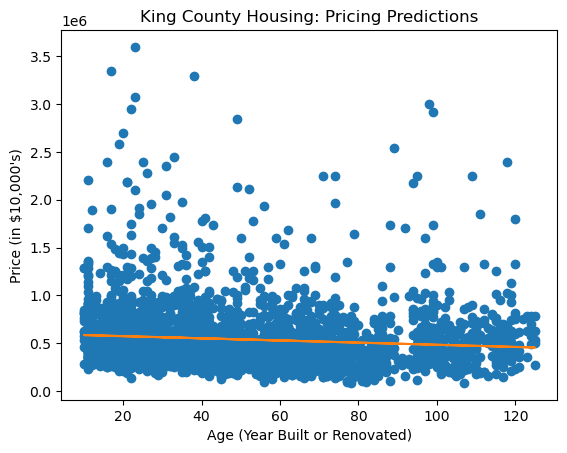

In [757]:
plt.plot(x_test['age'], y_test, 'o')
m, b = np.polyfit(x_test['age'], predicted_home_prices_test, 1)
plt.plot(x_test['age'], m*x_test['age']+b)
plt.title("King County Housing: Pricing Predictions")
plt.xlabel("Age (Year Built or Renovated)")
plt.ylabel("Price (in $10,000's)")
plt.show()

In [760]:
kc_model.predict([[20, 0, 3, 2, 1, 2500]])

c:\Users\bjhab\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([562163.34604938])

In [761]:
kc_model.predict([[20, 0, 3, 2, 1, 4000]])

c:\Users\bjhab\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([1014570.95563442])